## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.
number_mice=len(merge_df["Mouse ID"].unique())
number_mice

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=merge_df[merge_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
timepoint=duplicate_mice["Timepoint"]
duplicate_id=duplicate_mice["Mouse ID"]
duplicate_df=pd.DataFrame({"Mouse ID":duplicate_id,"Timepoint":timepoint})
duplicate_df

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice in the clean DataFrame.
number_no_duplicate=len(clean_df["Mouse ID"])
number_no_duplicate

1880

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_var = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename("Variance")
tumor_average = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename("Mean")
tumor_median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename("Media")
tumor_std=clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename("Standard Deviation")
tumor_sem=clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename("SEM")
tumor_df=pd.DataFrame({"Variance":tumor_var,"Mean":tumor_average,"Media":tumor_median,"Standar Deviation":tumor_std,"SEM":tumor_sem})
tumor_df

,Variance,Mean,Media,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,24.947764,40.675741,41.557809,4.994774,0.329346
Ceftamin,39.290177,52.591172,51.776157,6.268188,0.469821
Infubinol,43.128684,52.884795,51.820584,6.567243,0.492236
Ketapril,68.553577,55.235638,53.698743,8.279709,0.603860
Naftisol,66.173479,54.331565,52.509285,8.134708,0.596466
Placebo,61.168083,54.033581,52.288934,7.821003,0.581331
Propriva,43.852013,52.320930,50.446266,6.622085,0.544332
Ramicane,23.486704,40.216745,40.673236,4.846308,0.320955
Stelasyn,59.450562,54.233149,52.431737,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg_df=clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ["mean", "median","var","std","sem"]})
tumor_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

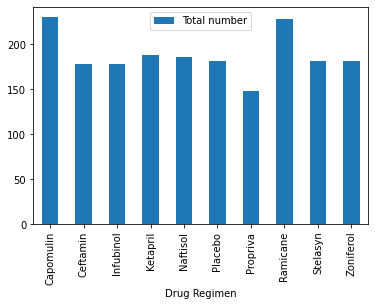

In [26]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen=clean_df.groupby(["Drug Regimen"])
mice_count=regimen["Mouse ID"].count()
mice_count_df=pd.DataFrame({"Total number":mice_count})
mice_count_df.plot(kind="bar")

Text(0, 0.5, 'Total Number')

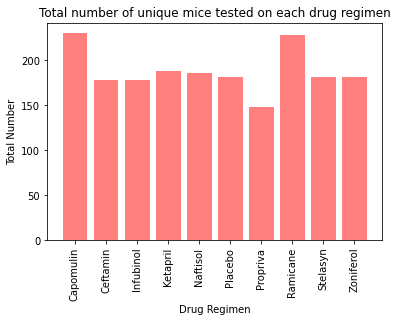

In [27]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
import numpy as np
x_axis=np.arange(len(mice_count_df))
tick_locations = [value for value in x_axis]
import numpy as np
plt.bar(x_axis, mice_count_df["Total number"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, mice_count_df.index,rotation="vertical")
plt.title("Total number of unique mice tested on each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number")

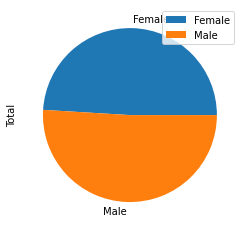

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count=clean_df.groupby(["Sex"]).count()["Mouse ID"]
sex_count_df=pd.DataFrame({"Total":sex_count})
sex_count_df.plot.pie(y="Total")

([<matplotlib.patches.Wedge at 0x1a3a6c6a760>,
 [Text(0.025222651364465283, 1.1997348948239135, 'Female'),
  Text(-0.023120866717440312, -1.0997569847571937, 'Male')],
 [Text(0.01471321329593808, 0.6998453553139495, '49.3%'),
  Text(-0.012611381845876532, -0.5998674462311966, '50.7%')])

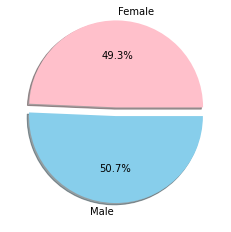

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=["Female","Male"]
count=[811,833]
color=["pink","skyblue"]
explode = (0.1, 0)
plt.pie(count, explode=explode, labels=sex, colors=color,
        autopct="%1.1f%%", shadow=True)

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_point=clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
last_point_df=pd.DataFrame({"Timepoint":last_point})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_time_df= pd.merge(last_point, clean_df, how="inner",on=["Mouse ID","Timepoint"])
tumor_time_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


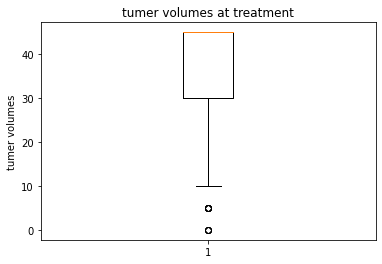

the outlier could be below 3.0739668737499812 or above 94.04403868375002


In [83]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin=tumor_time_df.loc[tumor_time_df["Drug Regimen"] == "Capomulin", :]
ca_tv=Capomulin["Tumor Volume (mm3)"]
Ramicane=tumor_time_df.loc[tumor_time_df["Drug Regimen"] == "Ramicane", :]
ra_tv=Ramicane["Tumor Volume (mm3)"]
Infubinol=tumor_time_df.loc[tumor_time_df["Drug Regimen"] == "Infubinol", :]
in_tv=Infubinol["Tumor Volume (mm3)"]
Ceftamin=tumor_time_df.loc[tumor_time_df["Drug Regimen"] == "Ceftamin", :]
ce_tv=Ceftamin["Tumor Volume (mm3)"]
four_treamtment_df=pd.DataFrame({"Capomulin":ca_tv,"Ramicane":ra_tv,"Infubinol"：in_tv，"Ceftamin":ce_tv})
    # add subset 
treatment_df=tumor_time_df.loc[(tumor_time_df["Drug Regimen"] == "Capomulin")|(tumor_time_df["Drug Regimen"] == "Ramicane")|(tumor_time_df["Drug Regimen"] == "Infubinol")|(tumor_time_df["Drug Regimen"] == "Ceftamin"),:]    

fig1, ax1 = plt.subplots()
ax1.set_title('tumer volumes at treatment')
ax1.set_ylabel('tumer volumes')
ax1.boxplot()
plt.show()
    # Determine outliers using upper and lower bounds

quartiles = treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier= treatment_df.loc[(treatment_df["Tumor Volume (mm3)"] < lower_bound) | (treatment_df["Tumor Volume (mm3)"] > upper_bound)]
print(f"the outlier could be below {lower_bound} or above {upper_bound}")

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

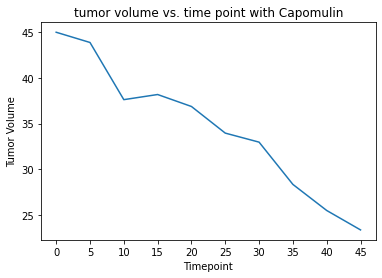

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plot_df=clean_df.set_index("Drug Regimen")
capomulin_treatment=plot_df.loc[["Capomulin"], ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
one_mouse = capomulin_treatment.loc[capomulin_treatment["Mouse ID"] == "s185", :]
x_axis=np.arange(len(one_mouse["Timepoint"]))
tick_locations = [value for value in x_axis]
plt.plot(x_axis, one_mouse["Tumor Volume (mm3)"])
plt.xticks(tick_locations, one_mouse["Timepoint"])
plt.title("tumor volume vs. time point with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()

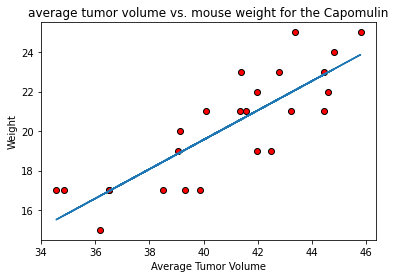

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tv_mw=plot_df.loc[["Capomulin"]]
average_vol=tv_mw.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
weight=tv_mw.groupby("Mouse ID").mean()["Weight (g)"]
plt.scatter(average_vol, weight, marker="o", facecolors="red", edgecolors="black")
plt.title("average tumor volume vs. mouse weight for the Capomulin")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Weight")
#liner regression
m, b = np.polyfit(average_vol, weight, 1)
plt.plot(average_vol, m*average_vol + b)
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weight,average_vol)[0],3)}")

The correlation coefficient between mouse weight and average tumor volume is 0.825
